In [37]:
import librosa
import soundfile as sf
import os
from IPython.display import Audio
import matplotlib.pyplot as plt 
import numpy as np
from scipy.fftpack import rfft, irfft, fftfreq, fft, rfftfreq,ifft
from scipy import signal
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import seaborn as sb

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import silhouette_score

In [39]:
name2 = 'Amr'
df = pd.DataFrame(columns=['chroma_mean','chroma_var','rms_mean','rms_var','spectral_centroid_mean','spectral_centroid_var',
                           'spectral_bandwidth_mean','spectral_bandwidth_var',
                           'spectral_rolloff_mean','spectral_rolloff_var','mfcc1_mean','mfcc1_var',
                           'mfcc2_mean','mfcc2_var','mfcc3_mean','mfcc3_var','mfcc4_mean','mfcc4_var',
                           'mfcc5_mean','mfcc5_var','mfcc6_mean','mfcc6_var','mfcc7_mean','mfcc7_var',
                           'mfcc8_mean','mfcc8_var','mfcc9_mean','mfcc9_var','mfcc10_mean','mfcc10_var',
                           'mfcc11_mean','mfcc11_var','mfcc12_mean','mfcc12_var','mfcc13_mean','mfcc13_var',
                           'mfcc14_mean','mfcc14_var','mfcc15_mean','mfcc15_var','mfcc16_mean','mfcc16_var',
                           'mfcc17_mean','mfcc17_var','mfcc18_mean','mfcc18_var','mfcc19_mean','mfcc19_var',
                           'mfcc20_mean','mfcc20_var'
                          ])

dir_ = './Website Data/'
original = list(os.listdir(dir_))
print(original)
for name in original:
    directory = dir_ + name
    audios = list(os.listdir(directory))
    if name == name2 :
        for a in audios:
            audio, sr = librosa.load(f"./Website Data/{name}/{a}", duration=2)
            audio = librosa.effects.trim(audio)
            audio = audio[0]

            features = [librosa.feature.chroma_stft(y=audio, sr=sr).mean(), librosa.feature.chroma_stft(y=audio, sr=sr).var(),
                        librosa.feature.rms(y=audio).mean(), librosa.feature.rms(y=audio).var(),
                        librosa.feature.spectral_centroid(y=audio).mean(),librosa.feature.spectral_centroid(y=audio).var(),
                        librosa.feature.spectral_bandwidth(y=audio).mean(),librosa.feature.spectral_bandwidth(y=audio).var(),
                        librosa.feature.spectral_rolloff(y=audio).mean(),librosa.feature.spectral_rolloff(y=audio).var()]

            mfcc = librosa.feature.mfcc(y=audio)
            mfcc_list = []
            for i in range(len(mfcc)):
                 mfcc_list.append(mfcc[i].mean())
                 mfcc_list.append(mfcc[i].var())

            features = features + mfcc_list

            df.loc[len(df)] = features
        df.to_csv(f'{name2}.csv', index=False)


['Amr', 'amr-others', 'Ibrahim', 'ibrahim-other', 'Mariam', 'Momen', 'momen-other', 'others', 'random']


C:\Users\I1bra\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1717
  return f(*args, **kwargs)


In [21]:

df = pd.read_csv('voice_catigorized2.csv')
df["result"].value_counts()

Others     643
Amr        205
Momen      194
Ibrahim    122
Mariam      83
Name: result, dtype: int64

In [22]:
df.to_csv('voice_catigorized2.csv', index=False)
X = df.drop(columns = 'result', axis=1)
Y = df['result']

In [13]:
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)

# new data frame with the new scaled data. 
X = pd.DataFrame(np_scaled, columns = cols)
X

,chroma_mean,chroma_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,spectral_rolloff_mean,spectral_rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.324969,0.549142,0.272240,0.097836,0.624159,0.179600,0.625115,0.266667,0.648546,0.280173,...,0.757466,0.461982,0.216861,0.176220,0.563461,0.180607,0.223511,0.194995,0.409353,0.484743
1,0.526011,0.425788,0.150712,0.045231,0.420561,0.102501,0.700580,0.094017,0.460834,0.163201,...,0.465653,0.292216,0.462101,0.413419,0.634247,0.293593,0.578370,0.038593,0.407726,0.168479
2,0.464137,0.644547,0.221431,0.090669,0.529188,0.243408,0.769946,0.276198,0.604357,0.412614,...,0.659569,0.239410,0.365974,0.323112,0.629934,0.471208,0.480431,0.082474,0.342134,0.237784
3,0.595852,0.484882,0.359004,0.203991,0.412830,0.199378,0.649506,0.447287,0.516828,0.537338,...,0.585042,0.278693,0.550980,0.145036,0.632744,0.559269,0.544557,0.352155,0.510078,0.168464
4,0.428318,0.722163,0.288811,0.164480,0.315989,0.145693,0.527355,0.259362,0.322365,0.318408,...,0.759283,0.458938,0.268696,0.302328,0.611793,0.639520,0.424027,0.127244,0.281249,0.433552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,0.560102,0.775642,0.424759,0.483257,0.319430,0.215667,0.449042,0.303511,0.362901,0.340626,...,0.782656,0.223688,0.453089,0.233310,0.403039,0.417402,0.690994,0.180177,0.446401,0.305454
311,0.417652,0.697003,0.420890,0.563682,0.256455,0.039689,0.326779,0.045555,0.302048,0.057750,...,0.854442,0.289204,0.572408,0.187424,0.184580,0.256447,0.710324,0.173680,0.348297,0.413155
312,0.442290,0.475965,0.479215,0.478310,0.377533,0.130260,0.383984,0.212381,0.487999,0.224674,...,0.805241,0.652373,0.750565,0.371129,0.566185,0.512514,0.885785,0.402110,0.233640,0.525431
313,0.364622,0.862645,0.546038,0.572679,0.230947,0.070656,0.285525,0.118241,0.282253,0.121811,...,0.676799,0.634146,0.681635,0.041094,0.448383,0.272446,0.812927,0.166866,0.530237,0.458574


9

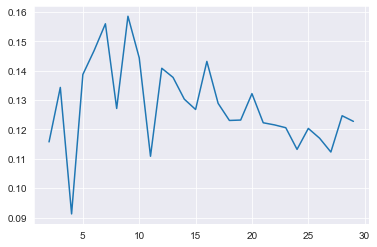

In [14]:
from sklearn.mixture import GaussianMixture as GMM
score = list()
mx = 0
highest = 0
for i in range(2,30):
    gmm = GMM(n_components=i).fit(X)
    labels = gmm.predict(X)
    s_score = silhouette_score(X, labels)
    score.append(s_score)
    if s_score > mx:
        mx = s_score
        highest = i
plt.plot(range(2,30), score)
highest


In [15]:
def get_accuracy(Y , labels, n_clusters):
    dic = {
    'Momen' : np.zeros(n_clusters),
    'Amr' : np.zeros(n_clusters),
    'Ibrahim' : np.zeros(n_clusters),
    'Mariam' : np.zeros(n_clusters),
    'Others' : np.zeros(n_clusters)}
    for i in range(len(Y)):
        dic[Y[i]][labels[i]] += 1
   
    print(f"Amr: n_cluster:     {np.argmax(dic['Amr'])}        accuracy: {max(dic['Amr'])/sum(dic['Amr'])}")
    print(dic['Amr'])
    
    print(f"Momen: n_cluster:   {np.argmax(dic['Momen'])}        accuracy: {max(dic['Momen'])/sum(dic['Momen'])}")
    print(dic["Momen"])
    
    print(f"Ibrahim: n_cluster:   {np.argmax(dic['Ibrahim'])}        accuracy: {max(dic['Ibrahim'])/sum(dic['Ibrahim'])}")
    print(dic["Ibrahim"])
    
    
    print(f"Mariam: n_cluster:   {np.argmax(dic['Mariam'])}        accuracy: {max(dic['Mariam'])/sum(dic['Mariam'])}")
    print(dic["Mariam"])

    
    print(f"Others: n_cluster:{np.argmax(dic['Others'])}  accuracy: {max(dic['Others'])/sum(dic['Others'])}")
    print(dic['Others'])
    

In [16]:
gmm = GMM(n_components=8).fit(X)
labels = gmm.predict(X)
get_accuracy(Y , labels, 8)

Amr: n_cluster:     5        accuracy: 0.8656716417910447
[ 0.  7.  1.  0.  1. 58.  0.]
Momen: n_cluster:   0        accuracy: nan
[0. 0. 0. 0. 0. 0. 0.]
Ibrahim: n_cluster:   0        accuracy: nan
[0. 0. 0. 0. 0. 0. 0.]
Mariam: n_cluster:   0        accuracy: nan
[0. 0. 0. 0. 0. 0. 0.]
Others: n_cluster:0  accuracy: 0.3387096774193548
[84. 20. 47. 35. 25.  3. 34.]


C:\Users\I1bra\AppData\Local\Temp\ipykernel_13096\2195784038.py:14: RuntimeWarning: invalid value encountered in double_scalars
  print(f"Momen: n_cluster:   {np.argmax(dic['Momen'])}        accuracy: {max(dic['Momen'])/sum(dic['Momen'])}")
C:\Users\I1bra\AppData\Local\Temp\ipykernel_13096\2195784038.py:17: RuntimeWarning: invalid value encountered in double_scalars
  print(f"Ibrahim: n_cluster:   {np.argmax(dic['Ibrahim'])}        accuracy: {max(dic['Ibrahim'])/sum(dic['Ibrahim'])}")
C:\Users\I1bra\AppData\Local\Temp\ipykernel_13096\2195784038.py:21: RuntimeWarning: invalid value encountered in double_scalars
  print(f"Mariam: n_cluster:   {np.argmax(dic['Mariam'])}        accuracy: {max(dic['Mariam'])/sum(dic['Mariam'])}")


In [43]:
y = df['result'] # result.
X = df.drop(columns = 'result', axis=1)

#### NORMALIZE X ####

# Normalize so everything is on the same scale. 

cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)

# new data frame with the new scaled data. 
X = pd.DataFrame(np_scaled, columns = cols)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,shuffle = True)

C:\Users\amrom\AppData\Local\Temp\ipykernel_47144\1597373593.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(heat_map_df.corr(), cmap="YlGnBu")


<AxesSubplot: >

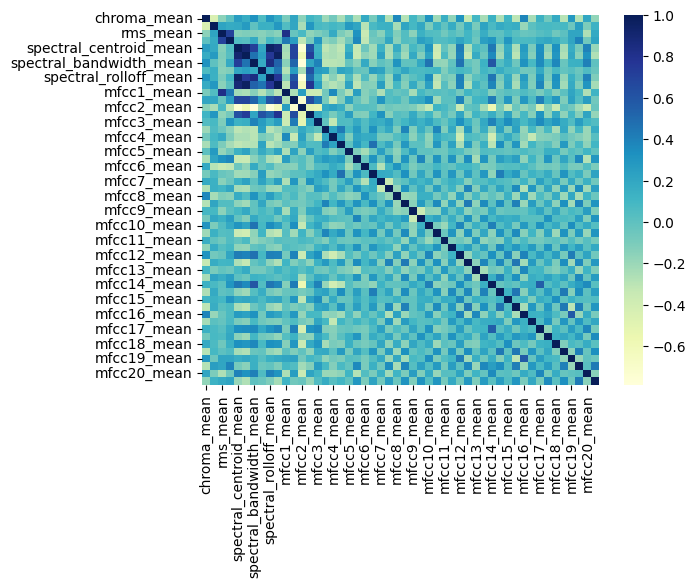

In [44]:
heat_map_df = pd.read_csv('voice_catigorized2.csv')
heat_map_df.replace(['Others','Amr','Ibrahim','Mariem',"Momen"],[0,1,2,3,4],inplace=True)
heat_map_df
sb.heatmap(heat_map_df.corr(), cmap="YlGnBu")

In [18]:
heat_map_df

,chroma_mean,chroma_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,spectral_rolloff_mean,spectral_rolloff_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,result
0,0.333621,0.095133,0.040846,0.002398,2052.740809,5.255800e+05,1871.000058,222105.011805,3769.053071,2.385099e+06,...,109.071625,-11.428280,75.022790,-0.883200,39.580692,-10.479553,51.611053,-4.341966,71.090830,1
1,0.383800,0.090671,0.026000,0.001144,1628.606369,3.186613e+05,1960.535688,107177.377433,3056.724811,1.556158e+06,...,75.582810,-7.179643,143.878750,0.045349,54.615640,-5.123288,24.375160,-4.366772,36.149240,1
2,0.368357,0.098584,0.034639,0.002227,1854.896855,6.968262e+05,2042.833293,228449.206972,3601.366346,3.323660e+06,...,65.165990,-8.845000,117.663750,-0.011224,78.250850,-6.601578,32.016540,-5.366591,43.806274,1
3,0.401233,0.092808,0.051446,0.004928,1612.500601,5.786580e+05,1899.939031,342337.671833,3269.210500,4.207528e+06,...,72.915250,-5.639864,65.970490,0.025637,89.969060,-5.633664,78.978970,-2.806619,36.147570,1
4,0.425950,0.087210,0.021331,0.001097,1671.475902,3.816570e+05,1990.761953,185032.749067,3197.928172,2.540907e+06,...,59.994728,-4.261891,49.470524,-1.805944,43.963830,-6.941187,24.361345,-3.390086,24.226759,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242,0.430784,0.091956,0.046783,0.006206,4113.574704,8.765243e+06,2079.460141,352949.346018,5850.843548,1.333551e+07,...,23.107965,-3.258664,57.187214,1.657221,20.512024,-1.004469,17.257654,1.791618,13.859071,0
1243,0.457786,0.083115,0.033215,0.002944,2760.175859,6.663784e+06,1923.367413,267212.907450,4153.556876,1.094091e+07,...,34.443260,-5.189065,34.785717,2.796566,19.514570,-1.407719,16.584867,-1.060594,19.550674,0
1244,0.452243,0.085037,0.045468,0.006496,3121.107682,8.108941e+06,1902.818693,244477.714619,4501.676994,1.237919e+07,...,37.989754,-5.464025,40.812744,0.015728,17.469496,0.137661,19.067953,1.695813,8.006286,0
1245,0.441338,0.100571,0.034034,0.002655,3755.324497,9.291051e+06,1962.829955,338356.034288,5254.720333,1.468672e+07,...,17.198070,-3.898363,31.695473,1.933409,13.959158,-1.614611,21.425362,-0.580612,13.971685,0


In [45]:
def model_assess(model, title = "Default"):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    #print(confusion_matrix(y_test, preds))
    print('Accuracy', title, ':', round(accuracy_score(y_test, preds), 5), '\n')

In [46]:
# Naive Bayes
nb = GaussianNB()
model_assess(nb, "Naive Bayes")

# Stochastic Gradient Descent
sgd = SGDClassifier(max_iter=5000, random_state=0)
model_assess(sgd, "Stochastic Gradient Descent")

# KNN
knn = KNeighborsClassifier(n_neighbors=19)
model_assess(knn, "KNN")

# Decission trees
tree = DecisionTreeClassifier()
model_assess(tree, "Decission trees")

# Random Forest
rforest = RandomForestClassifier(n_estimators=1000, max_depth=5, random_state=0)
model_assess(rforest, "Random Forest")

# Support Vector Machine
svm = SVC(decision_function_shape="ovo")
model_assess(svm, "Support Vector Machine")

# Logistic Regression
lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
model_assess(lg, "Logistic Regression")

# Neural Nets
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1)
model_assess(nn, "Neural Nets")



Accuracy Naive Bayes : 0.89867 

Accuracy Stochastic Gradient Descent : 0.94667 

Accuracy KNN : 0.944 

Accuracy Decission trees : 0.824 

Accuracy Random Forest : 0.89867 

Accuracy Support Vector Machine : 0.98133 

Accuracy Logistic Regression : 0.94133 



C:\Users\amrom\OneDrive\Desktop\task_3_workspace\Voice-Recognition-System\env\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Neural Nets : 0.93867 



C:\Users\amrom\OneDrive\Desktop\task_3_workspace\Voice-Recognition-System\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [47]:
error_rate = []
# Will take some time
for i in range(1,40):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

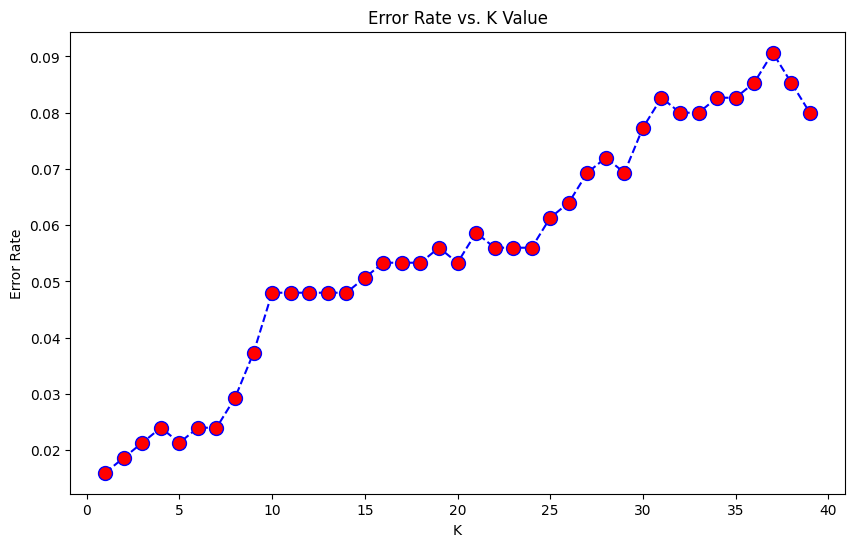

In [48]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [55]:
model = KNeighborsClassifier(n_neighbors=19)
model.fit(X_train, y_train)
preds = model.predict(X_test)
#print(confusion_matrix(y_test, preds))
round(accuracy_score(y_test, preds), 5)

0.944

In [17]:
def get_result(file):
    audio, sr = librosa.load(file, duration=2)

    features = [librosa.feature.chroma_stft(y=audio, sr=sr).mean(), librosa.feature.chroma_stft(y=audio, sr=sr).var(),
                librosa.feature.rms(y=audio).mean(), librosa.feature.rms(y=audio).var()]
    mfcc = librosa.feature.mfcc(y=audio)
    mfcc_list = []
    for i in range(len(mfcc)):
        mfcc_list.append(mfcc[i].mean())
        mfcc_list.append(mfcc[i].var())
    features = features + mfcc_list
    scaled = min_max_scaler.transform([features])
    res = model.predict(scaled)
    return res
get_result('operating copy.wav')[0]

C:\Users\amrom\OneDrive\Desktop\task_3_workspace\Voice-Recognition-System\env\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\amrom\OneDrive\Desktop\task_3_workspace\Voice-Recognition-System\env\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


'Amr'

In [56]:
audio, sr = librosa.load('operating copy.wav', duration=2)
sr
audio = librosa.effects.trim(audio)


In [57]:

audio, sr = librosa.load('C:/Users/amrom/OneDrive/Desktop/task_3_workspace/Voice-Recognition-System/Model/data/Amr/Amr1.wav', duration=2)
sr

22050

In [58]:
error_rate = []
# Will take some time
for i in range(1,40):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

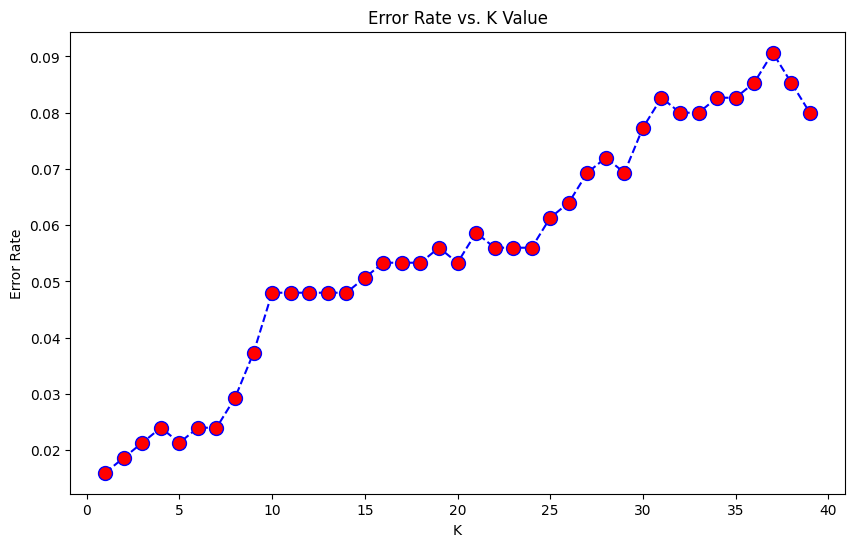

In [59]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [35]:
from IPython.display import Audio 
audio, sr = librosa.load('C:/Users/amrom/OneDrive/Desktop/task_3_workspace/Voice-Recognition-System/Model/Recongise_identity/Amr/_Voice 019 (1).wav', duration=2)
audio = librosa.effects.trim(audio)
Audio(audio[1], rate=sr)